# Face Recognition using CNN

 # Step1:
 
At the first, you should input the required libraries:

In [1]:
!pip install sklearn
!pip install pandas
!pip install pandas-datareader
!pip install matplotlib
!pip install pillow
!pip install requests
!pip install h5py
!pip install tensorflow==1.8.0
!pip install keras==2.2.0
!pip install opencv-python
!pip install opencv-contrib-python

ERROR: Could not find a version that satisfies the requirement tensorflow==1.8.0 (from versions: 2.5.0rc0, 2.5.0rc1, 2.5.0rc2, 2.5.0rc3, 2.5.0, 2.5.1, 2.5.2, 2.5.3, 2.6.0rc0, 2.6.0rc1, 2.6.0rc2, 2.6.0, 2.6.1, 2.6.2, 2.6.3, 2.7.0rc0, 2.7.0rc1, 2.7.0, 2.7.1, 2.8.0rc0, 2.8.0rc1, 2.8.0)
ERROR: No matching distribution found for tensorflow==1.8.0


In [3]:
!pip install tensorflow

  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached keras-2.7.0-py2.py3-none-any.whl (1.3 MB)
  Attempting uninstall: keras-preprocessing
    Found existing installation: Keras-Preprocessing 1.0.1
    Uninstalling Keras-Preprocessing-1.0.1:
      Successfully uninstalled Keras-Preprocessing-1.0.1
  Attempting uninstall: keras
    Found existing installation: Keras 2.2.0
    Uninstalling Keras-2.2.0:
      Successfully uninstalled Keras-2.2.0


In [13]:
!pip install keras==2.4.3

  Attempting uninstall: keras
    Found existing installation: Keras 2.3.0
    Uninstalling Keras-2.3.0:
      Successfully uninstalled Keras-2.3.0


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.7.0 requires keras<2.8,>=2.7.0rc0, but you have keras 2.4.3 which is incompatible.


In [8]:
from tensorflow.keras import models

In [14]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score
from keras.utils import np_utils
import itertools

# Step2:

* Load Dataset :

After loading the Dataset you have to normalize every image.

Note: an image is a Uint8 matrix of pixels and for calculation, you need to convert the format of the image to float or double

In [15]:
#load dataset
data = np.load('ORL_faces.npz') 

# load the "Train Images"
x_train = data['trainX']
#normalize every image
x_train = np.array(x_train,dtype='float32')/255

x_test = data['testX']
x_test = np.array(x_test,dtype='float32')/255

# load the Label of Images
y_train= data['trainY']
y_test= data['testY']

# show the train and test Data format
print('x_train : {}'.format(x_train[:]))
print('Y-train shape: {}'.format(y_train))
print('x_test shape: {}'.format(x_test.shape))

x_train : [[0.1882353  0.19215687 0.1764706  ... 0.18431373 0.18039216 0.18039216]
 [0.23529412 0.23529412 0.24313726 ... 0.1254902  0.13333334 0.13333334]
 [0.15294118 0.17254902 0.20784314 ... 0.11372549 0.10196079 0.11372549]
 ...
 [0.44705883 0.45882353 0.44705883 ... 0.38431373 0.3764706  0.38431373]
 [0.4117647  0.4117647  0.41960785 ... 0.21176471 0.18431373 0.16078432]
 [0.45490196 0.44705883 0.45882353 ... 0.37254903 0.39215687 0.39607844]]
Y-train shape: [ 0  0  0  0  0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  1  1  1  1
  2  2  2  2  2  2  2  2  2  2  2  2  3  3  3  3  3  3  3  3  3  3  3  3
  4  4  4  4  4  4  4  4  4  4  4  4  5  5  5  5  5  5  5  5  5  5  5  5
  6  6  6  6  6  6  6  6  6  6  6  6  7  7  7  7  7  7  7  7  7  7  7  7
  8  8  8  8  8  8  8  8  8  8  8  8  9  9  9  9  9  9  9  9  9  9  9  9
 10 10 10 10 10 10 10 10 10 10 10 10 11 11 11 11 11 11 11 11 11 11 11 11
 12 12 12 12 12 12 12 12 12 12 12 12 13 13 13 13 13 13 13 13 13 13 13 13
 14 14 14 14 14 14 1

# Step 3

Split DataSet : Validation data and Train 

Validation DataSet: this data set is used to minimize overfitting.If the accuracy over the training data set increases, but the accuracy over then validation data set stays the same or decreases, then you're overfitting your neural network and you should stop training.

 * Note: we usually use 30 percent of every dataset as the validation data but Here we only used 5 percent because the number of images in this dataset is very low. 



In [16]:
x_train, x_valid, y_train, y_valid= train_test_split(
    x_train, y_train, test_size=.05, random_state=1234,)

# Step 4

for using the CNN, we need to change The size of images ( The size of images must be the same)

In [17]:
im_rows=112
im_cols=92
batch_size=512
im_shape=(im_rows, im_cols, 1)

#change the size of images
x_train = x_train.reshape(x_train.shape[0], *im_shape)
x_test = x_test.reshape(x_test.shape[0], *im_shape)
x_valid = x_valid.reshape(x_valid.shape[0], *im_shape)

print('x_train shape: {}'.format(y_train.shape[0]))
print('x_test shape: {}'.format(y_test.shape))

x_train shape: 228
x_test shape: (160,)


# Step 5


Build CNN model:
 CNN have 3 main layer: 
 * 1-Convolotional layer 
 * 2- pooling layer  
 * 3- fully connected layer
 
 we could build a new architecture of CNN by changing the number and position of layers.
 

In [18]:

#filters= the depth of output image or kernels

cnn_model= Sequential([
    Conv2D(filters=36, kernel_size=7, activation='relu', input_shape= im_shape),
    MaxPooling2D(pool_size=2),
    Conv2D(filters=54, kernel_size=5, activation='relu', input_shape= im_shape),
    MaxPooling2D(pool_size=2),
    Flatten(),
    Dense(2024, activation='relu'),
     Dropout(0.5),
    Dense(1024, activation='relu'),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dropout(0.5),
    #20 is the number of outputs
    Dense(20, activation='softmax')  
])

cnn_model.compile(
    loss='sparse_categorical_crossentropy',#'categorical_crossentropy',
    optimizer=Adam(lr=0.0001),
    metrics=['accuracy']
)

C:\Users\acer\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:367: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Show the model's parameters.

In [19]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 106, 86, 36)       1800      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 53, 43, 36)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 49, 39, 54)        48654     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 24, 19, 54)        0         
_________________________________________________________________
flatten (Flatten)            (None, 24624)             0         
_________________________________________________________________
dense (Dense)                (None, 2024)              49841000  
_________________________________________________________________
dropout (Dropout)            (None, 2024)              0

# Step 6

Train the Model

* Note: You can change the number of epochs


In [20]:
history=cnn_model.fit(
    np.array(x_train), np.array(y_train), batch_size=512,
    epochs=50, verbose=2,
    validation_data=(np.array(x_valid),np.array(y_valid)),
)

Epoch 1/50
1/1 - 6s - loss: 2.9962 - accuracy: 0.0570 - val_loss: 2.9953 - val_accuracy: 0.0000e+00
Epoch 2/50
1/1 - 4s - loss: 3.0236 - accuracy: 0.0482 - val_loss: 3.0106 - val_accuracy: 0.0833
Epoch 3/50
1/1 - 3s - loss: 3.0244 - accuracy: 0.0921 - val_loss: 3.0303 - val_accuracy: 0.0833
Epoch 4/50
1/1 - 3s - loss: 3.0294 - accuracy: 0.0439 - val_loss: 3.0342 - val_accuracy: 0.0000e+00
Epoch 5/50
1/1 - 4s - loss: 3.0385 - accuracy: 0.0482 - val_loss: 3.0332 - val_accuracy: 0.0000e+00
Epoch 6/50
1/1 - 4s - loss: 3.0054 - accuracy: 0.0877 - val_loss: 3.0320 - val_accuracy: 0.0000e+00
Epoch 7/50
1/1 - 3s - loss: 3.0097 - accuracy: 0.0439 - val_loss: 3.0243 - val_accuracy: 0.0000e+00
Epoch 8/50
1/1 - 3s - loss: 3.0173 - accuracy: 0.0482 - val_loss: 3.0170 - val_accuracy: 0.0000e+00
Epoch 9/50
1/1 - 4s - loss: 2.9966 - accuracy: 0.0702 - val_loss: 3.0130 - val_accuracy: 0.0000e+00
Epoch 10/50
1/1 - 3s - loss: 2.9936 - accuracy: 0.0921 - val_loss: 3.0076 - val_accuracy: 0.0000e+00
Epoch 1

Evaluate the test data


In [21]:
scor = cnn_model.evaluate( np.array(x_test),  np.array(y_test), verbose=0)

print('test los {:.4f}'.format(scor[0]))
print('test acc {:.4f}'.format(scor[1]))

test los 1.9247
test acc 0.6812


# step 7

Plot Confusion Matrix

C:\Users\acer\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:454: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


accuracy : 
0.68125
Confusion matrix, without normalization
[[0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 6 0 0 0 0]
 [0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 2 0 0 0 0 2 0 0 4 0 0 0 0 0 0 0 0]
 [0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 4 0 0]
 [0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 7 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 2 0 0 0 0 0 6 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 4 0 1]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 7 0 0 0 0]
 [0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 8 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 5 0 0 3 0]
 [0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 6]]
Confusion matrix, without normalization


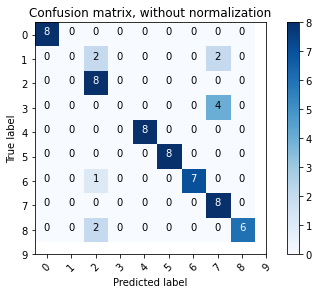

Confusion matrix, without normalization


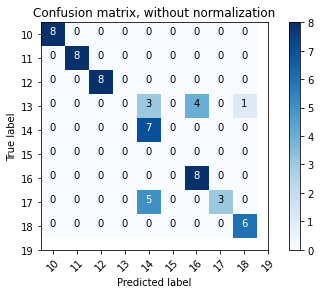

Confusion matrix:
[[0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 6 0 0 0 0]
 [0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 2 0 0 0 0 2 0 0 4 0 0 0 0 0 0 0 0]
 [0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 4 0 0]
 [0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 7 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 2 0 0 0 0 0 6 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 4 0 1]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 7 0 0 0 0]
 [0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 8 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 5 0 0 3 0]
 [0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 6]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1

C:\Users\acer\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\acer\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\acer\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [24]:
predicted =np.array( cnn_model.predict(x_test))
#print(predicted)
#print(y_test)
ynew = cnn_model.predict_classes(x_test)


Acc=accuracy_score(y_test, ynew)
print("accuracy : ")
print(Acc)
#/tn, fp, fn, tp = confusion_matrix(np.array(y_test), ynew).ravel()
cnf_matrix=confusion_matrix(np.array(y_test), ynew)

y_test1 = np_utils.to_categorical(y_test, 20)



def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()


print('Confusion matrix, without normalization')
print(cnf_matrix)

plt.figure()
plot_confusion_matrix(cnf_matrix[1:10,1:10], classes=[0,1,2,3,4,5,6,7,8,9],
                      title='Confusion matrix, without normalization')

plt.figure()
plot_confusion_matrix(cnf_matrix[11:20,11:20], classes=[10,11,12,13,14,15,16,17,18,19],
                      title='Confusion matrix, without normalization')

print("Confusion matrix:\n%s" % confusion_matrix(np.array(y_test), ynew))
print(classification_report(np.array(y_test), ynew))